In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

ref: https://muthu.co/mathematics-behind-k-mean-clustering-algorithm/

In [65]:
class KMeans:
    def __init__(self, k = 3, max_iter = 500):
        # initiate k and max_iter params
        self.k = k
        self.max_iter = max_iter
        
    # euclidean distance untuk menghitung distance antara
    # koordinat data dengan koordinat centroids
    def euclidean_distance(self, data, centroid):
        dist = np.sqrt((data[0] - centroid[0])**2 + (data[1] - centroid[1])**2)

        return dist
    
    def fit(self, data):
        
        # buat titik centroid awal dari koordinat dataset
        """
        if we initiate 3 centroids
        
        data = [[2, 3],
                [4, 5],
                [6, 7]
                ]
                
        centroid_1 = [2, 3]
        centroid_2 = [4, 5]
        centroid_3 = [6, 7]
        """
        self.centroids = {}
        for i in range(self.k):
            self.centroids[i] = data[i]
        
        # start k-means clustering process
        for i in range(self.max_iter):
            self.classes = {}
            
            for j in range(self.k):
                self.classes[j] = []
            
            # mencari distance antara data point dan centroid 
            for point in data:
                distances = []
                for index in self.centroids:
                    distances.append(self.euclidean_distance(point, self.centroids[index]))
                    
                cluster_index = distances.index(min(distances))
                self.classes[cluster_index].append(point)
            
            # mencari new centroid dari nilai average dari masing - masing cluster (data point nya)
            for cluster_index in self.classes:
                self.centroids[cluster_index] = np.average(self.classes[cluster_index], axis = 0)

In [66]:
kmeans = KMeans()

In [67]:
data = [4, 3]
centroid = [2, 1]

In [68]:
kmeans.euclidean_distance(data, centroid)

2.8284271247461903

In [69]:
X, y = make_blobs(n_samples = 300, centers = 3,
                  cluster_std = 0.60, random_state = 42)

In [70]:
kmeans.fit(X)

In [71]:
kmeans.centroids

{0: array([-6.64812834, -7.27912162]),
 1: array([-7.21897129, -6.45793309]),
 2: array([1.06029745, 5.51374038])}

In [72]:
list(kmeans.classes.keys())

[0, 1, 2]

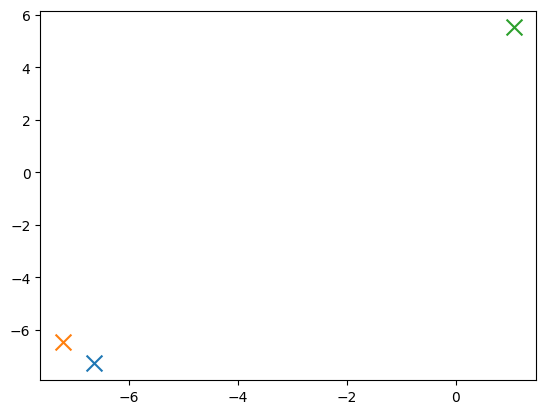

In [73]:
for centroid in kmeans.classes:
    plt.scatter(kmeans.centroids[centroid][0], kmeans.centroids[centroid][1], s = 130, marker = "x")


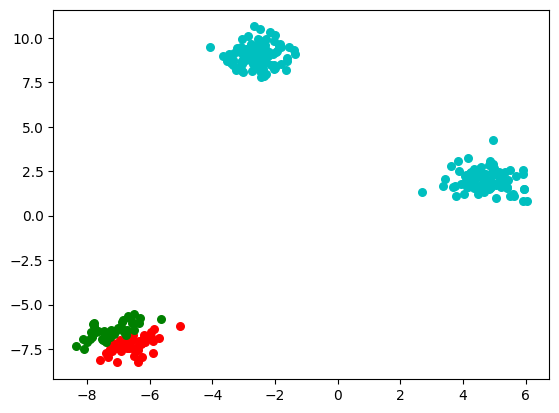

In [74]:
colors = 10*["r", "g", "c", "b", "k"]

for cluster_index in kmeans.classes:
    color = colors[cluster_index]
    for features in kmeans.classes[cluster_index]:
        plt.scatter(features[0], features[1], color = color, s=30)

In [75]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [77]:
data = data[["Annual Income (k$)", "Spending Score (1-100)"]].copy()

In [78]:
data_numpy = data.to_numpy()
data_numpy

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [79]:
kmeans = KMeans(k=5, max_iter=1000)

In [80]:
kmeans.fit(data_numpy)

In [81]:
kmeans.centroids

{0: array([26.30434783, 20.91304348]),
 1: array([25.72727273, 79.36363636]),
 2: array([88.2       , 17.11428571]),
 3: array([86.53846154, 82.12820513]),
 4: array([55.2962963 , 49.51851852])}

In [82]:
kmeans.classes

{0: [array([15, 39]),
  array([16,  6]),
  array([17, 40]),
  array([18,  6]),
  array([19,  3]),
  array([19, 14]),
  array([20, 15]),
  array([20, 13]),
  array([21, 35]),
  array([23, 29]),
  array([24, 35]),
  array([25,  5]),
  array([28, 14]),
  array([28, 32]),
  array([29, 31]),
  array([30,  4]),
  array([33,  4]),
  array([33, 14]),
  array([34, 17]),
  array([37, 26]),
  array([38, 35]),
  array([39, 36]),
  array([39, 28])],
 1: [array([15, 81]),
  array([16, 77]),
  array([17, 76]),
  array([18, 94]),
  array([19, 72]),
  array([19, 99]),
  array([20, 77]),
  array([20, 79]),
  array([21, 66]),
  array([23, 98]),
  array([24, 73]),
  array([25, 73]),
  array([28, 82]),
  array([28, 61]),
  array([29, 87]),
  array([30, 73]),
  array([33, 92]),
  array([33, 81]),
  array([34, 73]),
  array([37, 75]),
  array([38, 92]),
  array([39, 65])],
 2: [array([70, 29]),
  array([71, 11]),
  array([71,  9]),
  array([73,  5]),
  array([73,  7]),
  array([74, 10]),
  array([75,  5]),
 

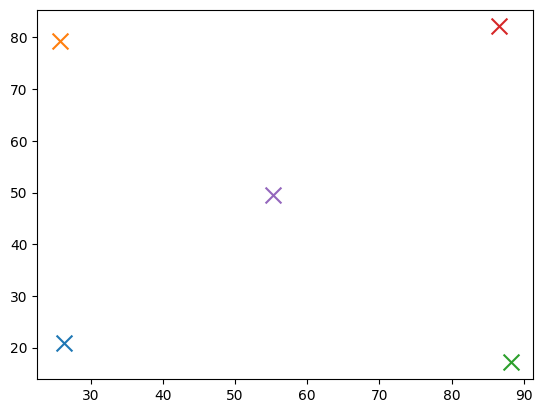

In [83]:
for centroid in kmeans.classes:
    plt.scatter(kmeans.centroids[centroid][0], kmeans.centroids[centroid][1], s = 130, marker = "x")

In [97]:
np.max(data_numpy)

137

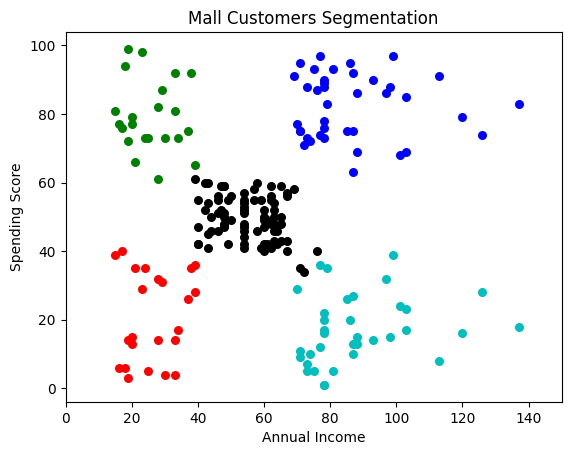

In [98]:
for cluster_index in kmeans.classes:
    color = colors[cluster_index]
    for features in kmeans.classes[cluster_index]:
        plt.title("Mall Customers Segmentation")
        plt.xlim(0, 150)
        plt.xlabel("Annual Income")
        plt.ylabel("Spending Score")
        plt.scatter(features[0], features[1], color = color, s=30)